*updated 18 Jan 2025, Julian Mak (whatever with copyright, do what you want with this)

### As part of material for OCES 3301 "Data Analysis in Ocean Sciences" delivered at HKUST

For the latest version of the material, go to the public facing [GitHub](https://github.com/julianmak/academic-notes/tree/master/OCES3301_data_analysis_ocean) page.

# 02: Python data reading and some data manipulation

While a good portion of this course uses data generated on the fly (e.g. see *assignment 1* and some samples from last session), "real" data is usually obtained from observations / numerical experiments / lab work that may be costly or not worthwhile repeating. Data is usually stored somewhere, and we want to be able to read it in order to do something with it.

Most data we are going to deal with here are going to be **text** format (e.g. with the *txt* or *csv* extension, though sometimes no extension at all), and towards the end of the course we are going to start reading some **binary** format data (in this case in the [netCDF](https://pro.arcgis.com/en/pro-app/latest/help/data/multidimensional/what-is-netcdf-data.htm) format, which is common in geophysical data). This is of course only representative, and while the reading commands might change, the analysis part should be largely similar.

Before we go on and as promised in the previous session, here is a picture of the cursed frog:

<img src="https://i.imgur.com/5qhT8OK.jpg" width="400" alt='cursed frog'>

> ## Key Objective(s)
> 1. Basic data reading and manipulations
> 2. Introduce the use of `pandas` to read/manipulate data.
> 3. Recall some basic statistical concepts and calculate these using Python.

In [1]:
# load some default packages
import matplotlib.pyplot as plt
import numpy as np
import urllib

--------------------

# a) Reading text-based data

Python natively will read text files. The file I made is in `rick_roll.txt`, which you could try and read it outside of Python (it's just a text file, so something like notepad will do it). To read it in Python, here are the somewhat old-fashioned (but very robust) commands you can do.

> NOTE: By default in this course I will be loading data "remotely", and this requires an internet connection.

In [2]:
option = "remote"

if option == "local":
    print("loading data locally (assumes file has already been downloaded)")
    f = open("rick_roll.txt", "r") # r/w/a = read/write/append, so here is "read only"
elif option == "remote":
    print("loading data remotely")
    path = "https://raw.githubusercontent.com/julianmak/OCES3301_data_analysis/refs/heads/main/rick_roll.txt"
    f = urllib.request.urlopen(path)
else:
    raise ValueError("INVALID OPTION: use 'remote' or 'local'")

print(f)

f.close()  # remember to close the file otherwise weird things might happen...

loading data remotely


So notice here none of the contents of the file actually got print to screen, because what is going on here is that a **pointer** (in this case the variable `txt_file`) is made to the file, providing an access point of sorts to do things to the file, until it is closed (through `txt_file.close()`). So no reading was actually done because no reading commands were actually issued, which in this case is done with `txt_file.readlines()`.

In [3]:
option = "remote"

if option == "local":
    print("loading data locally (assumes file has already been downloaded)")
    f = open("rick_roll.txt", "r") # r/w/a = read/write/append, so here is "read only"
elif option == "remote":
    print("loading data remotely")
    path = "https://raw.githubusercontent.com/julianmak/OCES3301_data_analysis/refs/heads/main/rick_roll.txt"
    f = urllib.request.urlopen(path)
else:
    raise ValueError("INVALID OPTION: use 'remote' or 'local'")

txt_src = f.readlines()

f.close()  # remember to close the file otherwise weird things might happen...

for k in range(len(txt_src)):
    if type(txt_src[k]) == str:
        txt_src[k] = txt_src[k].strip("\n")
    elif type(txt_src[k]) == bytes:
        txt_src[k] = txt_src[k].decode("utf-8").strip("\n")

print(txt_src)

loading data remotely
["We're no strangers to love", 'You know the rules and so do I', "A full commitment's what I'm thinking of", "You wouldn't get this from any other guy", '', "I just wanna tell you how I'm feeling", 'Gotta make you understand', '', 'Never gonna give you up', 'Never gonna let you down', 'Never gonna run around and desert you', 'Never gonna make you cry', 'Never gonna say goodbye', 'Never gonna tell a lie and hurt you', '', "We've known each other for so long", "Your heart's been aching but you're too shy to say it", "Inside we both know what's been going on", "We know the game and we're gonna play it", '', "And if you ask me how I'm feeling", "Don't tell me you're too blind to see", '', 'Never gonna give you up', 'Never gonna let you down', 'Never gonna run around and desert you', 'Never gonna make you cry', 'Never gonna say goodbye', 'Never gonna tell a lie and hurt you', 'Never gonna give you up', 'Never gonna let you down', 'Never gonna run around and desert you'

> NOTE: `readlines()` is a routine associated to the `txt_file` object, and `txt_file.readlines()` here is saying use the readlines command on itself. The reason for this kind of arrangement (called **object oriented programming**) is that in principle you pack the data together with the routines, so for example you can avoid calling routines to act on stuff that the routine was never designed for (e.g. the computer doesn't necessarily understand what calculating the variance means for a string?) Python is an **object-oriented** language.

Note that we closed the pointer to the file so references to `txt_file` should no longer work, but the data has been dumped out to `txt_src`, which is now the list of strings we can play with.

> NOTE: I stripped out the `\n` already (it stands for "new line"), with the `.strip` command.

In [4]:
for i in range(len(txt_src)):
    print(txt_src[i])

We're no strangers to love
You know the rules and so do I
A full commitment's what I'm thinking of
You wouldn't get this from any other guy

I just wanna tell you how I'm feeling
Gotta make you understand

Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you

We've known each other for so long
Your heart's been aching but you're too shy to say it
Inside we both know what's been going on
We know the game and we're gonna play it

And if you ask me how I'm feeling
Don't tell me you're too blind to see

Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you

Never gonna give, never gonna g

We could replace things in a string:

In [5]:
txt_src[-1].replace("Never", "Always")

'Always gonna say goodbye'

> <span style="color:red">**Q.**</span> what is the `-1`?

Writing to a file is similar: we open a pointer (this time with `w` for read), use the pointers `.write()` command to write a line, and when we are done, close it.

> NOTE: you need the `\n` to tell Python to write a new line. Here I did this by adding `\n` to every line being written.

Writing would generally be useful for example if there is some data you analysed, and re-running the code will take a while, or you want to share the processed results with someone.

In [6]:
txt_file = open("rick_roll_troll.txt", "w")
for i in range(len(txt_src)):
    txt_file.write(txt_src[i].replace("Never", "Always") + "\n") 
txt_file.close()

> <span style="color:red">**Q.**</span> what is the above code doing?

The code below provides an alternative way to opening a file that closes it immediate after reading, through the `with` command.

In [7]:
with open("rick_roll_troll.txt", "r") as f:
    mod_txt = f.readlines()
for line in range(len(mod_txt)):
    print(mod_txt[line].replace("\n", ""))

We're no strangers to love
You know the rules and so do I
A full commitment's what I'm thinking of
You wouldn't get this from any other guy

I just wanna tell you how I'm feeling
Gotta make you understand

Always gonna give you up
Always gonna let you down
Always gonna run around and desert you
Always gonna make you cry
Always gonna say goodbye
Always gonna tell a lie and hurt you

We've known each other for so long
Your heart's been aching but you're too shy to say it
Inside we both know what's been going on
We know the game and we're gonna play it

And if you ask me how I'm feeling
Don't tell me you're too blind to see

Always gonna give you up
Always gonna let you down
Always gonna run around and desert you
Always gonna make you cry
Always gonna say goodbye
Always gonna tell a lie and hurt you
Always gonna give you up
Always gonna let you down
Always gonna run around and desert you
Always gonna make you cry
Always gonna say goodbye
Always gonna tell a lie and hurt you

Always gonna 

--------------

# b) Reading numeric data but in text format

Lets try a slightly less stupid example but one that highlights some generic things to watch out for. The (text) file `elnino34_sst.data` contains sea surface temperature (SST) data over the El-Nino 3.4 region.

> NOTE: if you don't know what El-Nino is, go to Wikipedia, OCES 2003 notes, or ENVS 3004 / OCES 4001 notes

Lets just open it and see what it contains.

In [8]:
option = "remote"

if option == "local":
    print("loading data locally (assumes file has already been downloaded)")
    f = open("elnino34_sst.data", "r")
elif option == "remote":
    print("loading data remotely")
    path = "https://raw.githubusercontent.com/julianmak/OCES3301_data_analysis/refs/heads/main/elnino34_sst.data"
    f = urllib.request.urlopen(path)
else:
    raise ValueError("INVALID OPTION: use 'remote' or 'local'")

elnino34_txt = f.readlines()
for k in range(len(elnino34_txt)):
    if type(elnino34_txt[k]) == str:
        elnino34_txt[k] = elnino34_txt[k].strip("\n")
    elif type(elnino34_txt[k]) == bytes:
        elnino34_txt[k] = elnino34_txt[k].decode("utf-8").strip("\n")
elnino34_txt

loading data remotely


['        1948        2019',
 ' 1948 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99',
 ' 1949 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99',
 ' 1950  24.55  25.06  25.87  26.28  26.18  26.46  26.29  25.88  25.74  25.69  25.47  25.29',
 ' 1951  25.24  25.71  26.90  27.58  27.92  27.73  27.60  27.02  27.23  27.20  27.25  26.91',
 ' 1952  26.67  26.74  27.17  27.80  27.79  27.18  26.53  26.30  26.36  26.26  25.92  26.21',
 ' 1953  26.74  27.00  27.57  28.04  28.28  28.12  27.43  26.94  27.01  26.87  26.88  27.00',
 ' 1954  26.98  27.03  26.90  26.64  27.12  26.80  26.11  25.43  25.12  25.23  25.57  25.26',
 ' 1955  25.61  25.81  26.22  26.60  26.66  26.55  26.15  25.51  25.28  24.41  24.25  24.57',
 ' 1956  25.34  25.76  26.46  26.85  27.13  26.81  26.23  25.68  25.73  25.75  25.56  25.71',
 ' 1957  26.04  26.54  27.46  28.23  28.55  28.36  28.17  27.69  27.44  27.42  27.62  27.90',
 ' 1958  28.33  28.24  28.27  2

So while I read the file as a list, the entries we are primarily interested in are numbers, so we want a way to pull the numbers out. Also, note that:

1) There are a few unnecessary line at the beginning (the **headers**) and at the end (the **footers**), that we should get rid of probably for the data analysis purposes.

2) The year is on the left column, but we probably don't need that.

3) It looks like there are 12 columns, which in this case really does correspond to entries to each of the months.

> NOTE: I think (but I can't remember) this is actually raw monthly averaged SST values, rather than averaged over a window to give *low-passed* data; see *07_time_series* for what this means if you want.

4) there are entries of `-99.99`, which in this case are **missing values** (no data), which you probably want to do something about

> NOTE: Sometimes the missing values show up as something else, or marked on differently, so you do need to check for these. How you deal with those is a separate issue (e.g. if the missing value occurs in the middle of some time, do you approximate it as something, fill it with something else, ignore it? The choice can affect the resulting analysis and is really guided by what question you are trying to answer. More on this in `08_time_series`.

Here I am going to process this the old-fashioned way to illustrate the points. I am going to

1) Strip out by hand the first 3 lines (header and the two lines with the missing values), and the last 4 lines (the footers).

2) Read each line, split out the entires somehow, but skip the first one (so not bothering with the year), noting that we are going from 1950 to 2019, and dump out the numbers per read.

3) Turn the eventual list into an array.

The code below does this, but for demonstration purposes, you should run the individual component separately (in different cells for example) to convince yourself what each part of the code is doing.

In [9]:
option = "remote"

if option == "local":
    print("loading data locally (assumes file has already been downloaded)")
    f = open("elnino34_sst.data", "r")
elif option == "remote":
    print("loading data remotely")
    path = "https://raw.githubusercontent.com/julianmak/OCES3301_data_analysis/refs/heads/main/elnino34_sst.data"
    f = urllib.request.urlopen(path)
else:
    raise ValueError("INVALID OPTION: use 'remote' or 'local'")

elnino34_txt = f.readlines()
elnino34_txt = elnino34_txt[3:-4]
for k in range(len(elnino34_txt)):
    if type(elnino34_txt[k]) == str:
        elnino34_txt[k] = elnino34_txt[k].strip("\n")
    elif type(elnino34_txt[k]) == bytes:
        elnino34_txt[k] = elnino34_txt[k].decode("utf-8").strip("\n")

elnino34_txt[0].split() # then we split each line (as a string) up into components

loading data remotely


['1950',
 '24.55',
 '25.06',
 '25.87',
 '26.28',
 '26.18',
 '26.46',
 '26.29',
 '25.88',
 '25.74',
 '25.69',
 '25.47',
 '25.29']

In [10]:
# define an empty list, cycle through each line, split, and add in the entries
elnino34_sst = []
for k in range(len(elnino34_txt)):           # this is the new elnino34_txt after stripping out some lines
    dummy = elnino34_txt[k].split()          # split out the entries per line
    for i in range(1, len(dummy)):           # cycle through the dummy list but skip the first entry
        elnino34_sst.append(float(dummy[i])) # turn string into a float, then add to list

elnino34_sst = np.asarray(elnino34_sst)      # turn into array (not strictly necessary)
print(elnino34_sst)

[24.55 25.06 25.87 26.28 26.18 26.46 26.29 25.88 25.74 25.69 25.47 25.29
 25.24 25.71 26.9  27.58 27.92 27.73 27.6  27.02 27.23 27.2  27.25 26.91
 26.67 26.74 27.17 27.8  27.79 27.18 26.53 26.3  26.36 26.26 25.92 26.21
 26.74 27.   27.57 28.04 28.28 28.12 27.43 26.94 27.01 26.87 26.88 27.
 26.98 27.03 26.9  26.64 27.12 26.8  26.11 25.43 25.12 25.23 25.57 25.26
 25.61 25.81 26.22 26.6  26.66 26.55 26.15 25.51 25.28 24.41 24.25 24.57
 25.34 25.76 26.46 26.85 27.13 26.81 26.23 25.68 25.73 25.75 25.56 25.71
 26.04 26.54 27.46 28.23 28.55 28.36 28.17 27.69 27.44 27.42 27.62 27.9
 28.33 28.24 28.27 28.27 28.31 27.99 27.32 26.85 26.4  26.45 26.75 26.62
 27.07 27.18 27.47 27.88 27.7  27.37 26.44 26.09 25.92 26.24 26.04 26.18
 26.27 26.29 26.98 27.49 27.68 27.24 26.88 26.7  26.44 26.22 26.26 26.22
 26.23 26.56 26.94 27.36 27.75 27.67 26.89 26.19 25.78 25.71 26.07 25.97
 25.96 26.19 26.8  27.13 27.05 27.08 26.76 26.33 25.94 25.97 25.75 25.67
 25.77 26.22 27.18 27.78 27.63 27.62 27.78 27.48 27.4 

> <span style="color:red">**Q.**</span> What is the size of this array (look up how you might check), and is it exactly the same size as you expect it to be (what is the number of entries you should be getting)?

Do a raw plot of this to see what the data looks like.

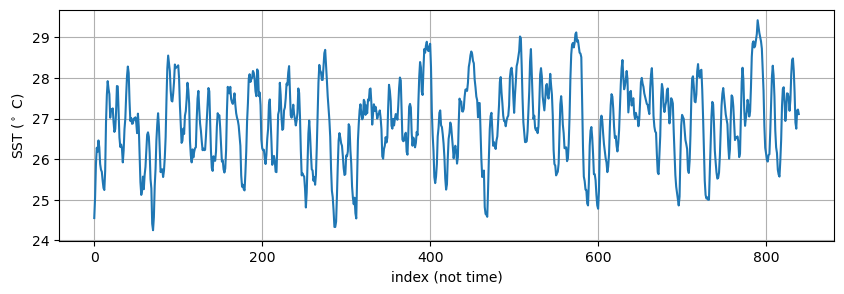

In [11]:
fig = plt.figure(figsize=(10, 3))
ax = plt.axes()
ax.plot(elnino34_sst)
ax.set_xlabel(r"index (not time)")
ax.set_ylabel(r"SST (${}^\circ\ \mathrm{C}$)")
ax.grid()

Notice here I haven't bothered to process the time (so there is no "time" to plot against), but it can in principle be generated. I could also have plotted straight from a list, but for data manipulation having an array is easier.

> <span style="color:red">**Q.**</span> (NEEDS CARE) Create a time vector manually so you can plot the above graph against a proper time showing a year (trying using `np.linspace`; look up syntax via `np.linspace?` or Google, being careful about the END year.

> <span style="color:red">**Q.**</span> Modify the code above so `elnino34_sst` stays a list, and try taking away a fixed number from it (say do `elnino34_sst - 2`), what happens? Do you get the same results from `elnino34_sst` as an array? Why?

## Introducing [pandas](https://pandas.pydata.org/)

<img src="https://i.imgur.com/rKcpZzr.jpg" width="400" alt='cursed panda'>

The Python Pandas package (not the cursed panda above; longer tutorial [here](https://www.w3schools.com/python/pandas/default.asp)) is a versatile package that is particularly good for packaging data and doing relevant analysis on.

Whatever I am going to be doing over for the rest of this course can probably be done through Pandas in principle, but I am mostly not going to be doing things through Pandas, as I think it hides a bit of the detail I think is important to go through somewhat. But an ongoing exercise would be for you do whatever I am doing but in Pandas.

Anyway, reading data can be done through the `read_csv` command that comes with pandas.

In [12]:
import pandas as pd

option = "remote"

if option == "local":
    print("loading data locally (assumes file has already been downloaded)")
    path = "elnino34_sst.data"
elif option == "remote":
    print("loading data remotely")
    path = "https://raw.githubusercontent.com/julianmak/OCES3301_data_analysis/refs/heads/main/elnino34_sst.data"
else:
    raise ValueError("INVALID OPTION: use 'remote' or 'local'")

data = pd.read_csv(path)
print(data)

loading data remotely
                                     1948        2019
0    1948 -99.99 -99.99 -99.99 -99.99 -99.99 -99.9...
1    1949 -99.99 -99.99 -99.99 -99.99 -99.99 -99.9...
2    1950  24.55  25.06  25.87  26.28  26.18  26.4...
3    1951  25.24  25.71  26.90  27.58  27.92  27.7...
4    1952  26.67  26.74  27.17  27.80  27.79  27.1...
..                                                ...
70   2018  25.57  25.97  26.48  27.31  27.73  27.7...
71   2019  27.19  27.46  28.09  28.44  28.48  28.1...
72                                             -99.99
73             Nino 3.4 Index  using ersstv5 from CPC
74   https://www.esrl.noaa.gov/psd/data/climateind...

[75 rows x 1 columns]


So generally pandas ***tries*** to read things assuming sensible layout etc., but that can fail if the data is not cleaned up (and uncleaned data is the default rather than the norm). So, it is generally advised to have a look at the raw data file first to see what it consists, anticipate what things you might need to do, and  know back up options (hence somewhat of a reason for the above manipulations in the old-fashioned way).

> NOTE: Again, it is probably good to accept that data you will get your hands on is almost never cleaned up, learn what kind of problems can get thrown up and learn how to deal with it, instead of always getting clean data and not knowing what to do when data you get is no longer clean.

In this case, optional arguments needs to be provided (e.g. delimiter, separator, etc...). I've done the whole thing below.

> <span style="color:red">**Q.**</span> Experiment on what happens if you mess around with the options below and what outputs you get (giving you some experience as to what the "wrong" things look like)

In [13]:
# can give it a few more details to make it easier for pandas to help us
data = pd.read_csv(path,
            sep='\s+',  # white space as delimiter
            names=["year", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
            skipfooter=4,  # chop out some lines
            skiprows=1,    # chop out some unnecessary lines
            false_values=-99.99,
            engine="python")
data = data.replace(-99.99, np.nan) # replace missing values with NaNs (not a number)
data = data.set_index("year")       # sets the index to be the year column
data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,24.55,25.06,25.87,26.28,26.18,26.46,26.29,25.88,25.74,25.69,25.47,25.29
1951,25.24,25.71,26.90,27.58,27.92,27.73,27.60,27.02,27.23,27.20,27.25,26.91
1952,26.67,26.74,27.17,27.80,27.79,27.18,26.53,26.30,26.36,26.26,25.92,26.21
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,27.05,27.17,27.75,28.52,28.85,28.90,28.75,28.79,28.93,29.08,29.42,29.26
2016,29.11,29.01,28.90,28.72,28.23,27.69,26.82,26.28,26.14,25.98,25.94,26.10
2017,26.12,26.67,27.32,28.03,28.30,28.06,27.54,26.70,26.29,26.15,25.74,25.62


You can think of the Pandas data frame like a dictionary, so you could for example do the following.

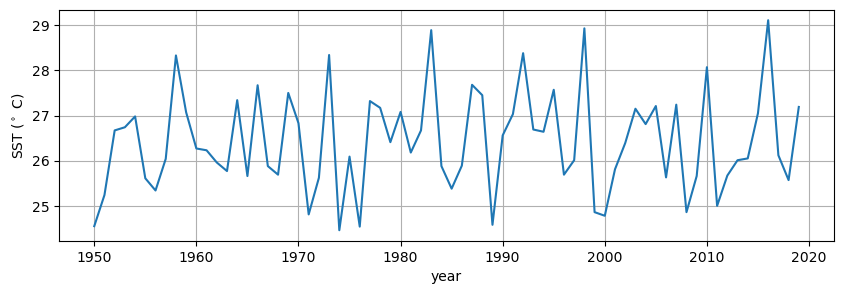

In [14]:
fig = plt.figure(figsize=(10, 3))

# forces pandas to plot on the given ax object, otherwise it generates a new one
ax = plt.axes()
data["Jan"].plot(ax=ax) 

# because year is set as index, so data is being plotted against index
#  can modify this accordingly
ax.set_xlabel(r"year")
ax.set_ylabel(r"SST (${}^\circ\ \mathrm{C}$)")
ax.grid()

Note you do have a time-axis here, because the `year` column was not discarded in this case, but it is of course less obvious how you plot the whole time-series out.

> <span style="color:red">**Q.**</span> What is the above actually doing?

> <span style="color:red">**Q.**</span> With a for loop or otherwise, plot the data for all 12 months of data at the same time.

The code below is basically the same as above, but here I pull out the data in the Pandas data frame using the `.values` command (so now I am dealing with an array).

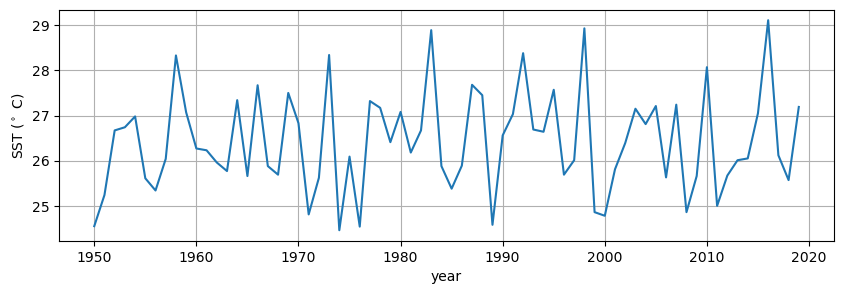

In [15]:
# the code is does basically the same as above

year = data.index.values
sst  = data["Jan"].values

fig = plt.figure(figsize=(10, 3))
ax = plt.axes()
ax.plot(year, sst)
ax.set_xlabel(r"year")
ax.set_ylabel(r"SST (${}^\circ\ \mathrm{C}$)")
ax.grid()

> <span style="color:red">**Q.**</span> (harder) Try and see if you can bully Pandas into plotting out the whole data array as a complete time-series

--------------------

# c) Basic statistics (and some more Pandas)

Having a whole load of data is all well and good but we want some way to quantify these, so the rest of the course deals with that. The main kind of data we are going to be deal with are going to be **numbers**, and essentially we are going to be doing calculations for things.

For ease of talking, I am going to introduce some terminology and notation that I am not going to be very rigourous in defining. A **random variable** $X$ (capital letters) following some **probability distribution** can be sampled, and I am going to denote the **samples** of the random variable as $x_i$ (small letters, with index $i$ denoting the $i^{\rm{th}}$ sample).

> NOTE: $X$ really is a map from the sample space $\Omega$ (space of all possible outcomes) to some measurable space $E$, but we don't really need this here...

For most intents and purposes, we are going to be dealing with $x_i$, the data, and occasionally the probability distribution function or the random variable, but otherwise you can largely forget about the rest of the stuff I just said.

## Average

So there are really three kinds of *averages*, but usually when we talk about THE average, we really mean the **mean**. We are going to skip that for the moment and talk about the other two first. 

1) **Mode**, the sample value that occurs the most.

2) **Median**, order the samples, and pick the middle one.

We will usually not use the mode, but the median will show up when we do the box-and-whisker plots (as the middle line, or the **50th quartile**).

`Numpy` has a built in function for this.

In [16]:
ages = np.asarray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

print(f"median of ages = {np.median(ages)}")

median of ages = 5.0


## Range and quartiles

The **range** of the sample is simply the distance between the smallest and largest value, and is a rather crude measure of spread.

The **upper/lower quartiles** or the **75/25 quartile** is also a measure of spread, but for data in the center. The upper quartile is the location above which 25% of the ranked data lies (or location of where 75% of the data lies below), and the lower quarter is analogously defined.

These can be respectively done by a simple `max - min`, and for example the `np.percentile` command.

In [17]:
print(f"range of ages = {np.max(ages)} - {np.min(ages)} = {np.max(ages) - np.min(ages)}")
print(f"lower quartile = {np.percentile(ages, 25)}")
print(f"mid   quartile = {np.percentile(ages, 50)}")
print(f"upper quartile = {np.percentile(ages, 75)}")
print("")
print(f"quartile of ages in one go = {np.percentile(ages, [25, 50, 75])}")

range of ages = 10 - 0 = 10
lower quartile = 2.5
mid   quartile = 5.0
upper quartile = 7.5

quartile of ages in one go = [2.5 5.  7.5]


The range and quartiles can be shown in a diagram through a **box-and-whisker diagram** (or a **box plot**). The code below does a box plot, and the features are:

* The line in the box, which is the median.
* The edges of the box, which are the upper and lower quartiles, and the ranges is called the **inter-quartile range**.
* The whiskers, use to denote data outside of the inter-quartile range.
* The edges of the whiskers, which denote the range.

Sometimes when you use the built in boxplot commands extra circles appear. These usually denote the **outliers**, that are sufficiently far away from the median (usually measured by some factor of the inter-quartile range). You'll see this a bit more later when we look at the Iris data.

Text(5, 1.25, 'IQR')

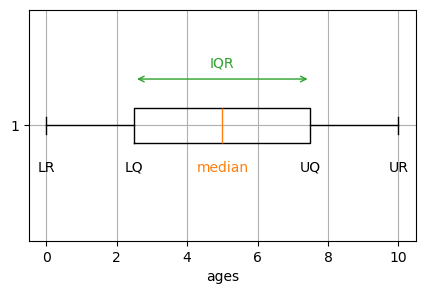

In [18]:
# more plotting: box-and-whisker

fig = plt.figure(figsize=(5, 3))
ax = plt.axes()
ax.boxplot(ages, vert=False)
ax.grid()
ax.set_xlabel(r"ages")
ax.text(2.5, 0.8, "LQ", horizontalalignment='center')
ax.text(5, 0.8, "median", horizontalalignment='center', color="C1")
ax.text(7.5, 0.8, "UQ", horizontalalignment='center')
ax.text(0, 0.8, "LR", horizontalalignment='center')
ax.text(10, 0.8, "UR", horizontalalignment='center')

ax.annotate("", xy=(7.5, 1.2), xytext=(2.5, 1.2), arrowprops=dict(arrowstyle="<->", color="C2"))
ax.text(5, 1.25, "IQR", horizontalalignment='center', color="C2")

## Mean and variance / standard deviation

For $N$ samples with outcomes $x_i$, the **mean** of a sample $\overline{x}$ is defined as

\begin{equation*}
    \overline{x} = \frac{x_1 + x_2 + \ldots + x_N}{N} = \frac{1}{N}\sum_{i=1}^N x_i,
\end{equation*}

i.e. sum up all numbers (unweighted) and divide by the total number of samples.

> NOTE: I am going to be making a distinction in *05/06_statistical_tests* between the **sample mean** $\overline{x}$ and the **population mean** $\mu$ (the Greek character "mu", i.e. like the sound a cat makes).

So you need a way to count the number of samples, and to sum things. The code below shows how you might do this in a brute force way, a slightly more elegant way, and the easy way.

In [19]:
# the really old fashioned way (partly to demonstrate some more syntax)
# compute the sum and count the number of numbers, then compute the mean
ages_avg, count = 0.0, 0
for i in range(len(ages)):
    count    += 1   # "count += 1" is equivalent to "count = count + 1"
    ages_avg += ages[i]

print(f"mean from the slow way = {ages_avg / count}")

# the cleaner way
ages_sum = np.sum(ages)
count = len(ages)
print(f"mean from sum / count  = {ages_sum / count}")

# the inbuilt way
print(f"mean from using np.mean= {np.mean(ages)}")

mean from the slow way = 5.0
mean from sum / count  = 5.0
mean from using np.mean= 5.0


Most of the time, I am going use the unadjusted version of the **variance** $s^2$:

\begin{equation*}
    s^2 = \frac{(x_1 - \overline{x})^2 + (x_2 - \overline{x})^2 + \ldots + (x_N - \overline{x})^2}{N} = \frac{1}{N}\sum_{i=1}^{N} (x_i - \overline{x})^2,
\end{equation*}

i.e. take the sample mean from each sample away, square it, sum it, then divide by the number of samples. 

Two observations to makes here is that:

1) The variance is positive definite, and is only zero if every sample is the same as the sample mean.

2) If the sample size $N$ is large and only one sample is far from the mean, then that sample's contribution to the variance is rather minimal (because of the division by $N$).

From this, convince yourself that the variance is a measure of spread, and deviation away from the mean. The (unadjusted) **standard deviation**, which I will be short handing as s.t.d., partly for the puns I can make, is just the square root of the variance.

> NOTE: I am also going to make a distinction in *05/06_statistical_tests* between the **sample s.t.d.** $s$, and the **population s.t.d.** (heh) $\sigma$

The code below does the same as the calculations for the variance and the s.t.d., with one verbose way, one easier way, and one using the inbuilt command in `numpy` (`np.std`).

In [20]:
# demonstrate with only mean and variance for now

ages = np.asarray([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=float)  # force this to be float to stop a complaint
ages_avg = np.mean(ages)

# take the mean off every number in the array, and then compute things needed for standard deviation
# I am going to compute the variance then work out the s.d.
ages_var, count = 0.0, 0  # reset the counter
for i in range(len(ages)):
    count    += 1
    ages_var +=(ages[i] - ages_avg)**2

ages_var /= count

print(f"stats from verbose code: mean = {ages_avg}, variance = {ages_var}, s.t.d. = {np.sqrt(ages_var):.3f}")

# slightly less verbose way of doing above
ages_var = np.sum((ages - ages_avg)**2) / len(ages)
print(f"stats from cleaner code: mean = {ages_avg}, variance = {ages_var}, s.t.d. = {np.sqrt(ages_var):.3f}")

# using the inbuilt s.t.d.
print(f"stats from command     : mean = {np.mean(ages)}, variance = {np.var(ages)}, s.t.d. = {np.std(ages):.3f}")

stats from verbose code: mean = 5.0, variance = 10.0, s.t.d. = 3.162
stats from cleaner code: mean = 5.0, variance = 10.0, s.t.d. = 3.162
stats from command     : mean = 5.0, variance = 10.0, s.t.d. = 3.162


### !!! USER BEWARE !!!

So here is an example why sometimes one should know the old-fashioned way of doing things, and be very careful when using inbuilt commands. Suppose I use instead another command for standard deviation from a different package (in this case the `statistics` package), and do the same thing above, I would get the following.

In [21]:
import statistics as stat

print(f"""stats from another package: 

mean = {stat.mean(ages)}, variance = {stat.variance(ages)}, s.d. = {stat.stdev(ages):.3f}""")

stats from another package: 

mean = 5.0, variance = 11.0, s.d. = 3.317


The mean is the same but the variance and the s.t.d's (heh) are different, whats the deal?

I was quite explicit in saying I was using the unadjusted variance / s.t.d., and there is an adjusted version with what's called the **Bessel correction**,

\begin{equation*}
    s^2 = \frac{(x_1 - \overline{x})^2 + (x_2 - \overline{x})^2 + \ldots + (x_N - \overline{x})^2}{N - 1} = \frac{1}{N - 1}\sum_{i=1}^{N} (x_i - \overline{x})^2.
\end{equation*}

The variance and s.t.d. calculations in `numpy` uses the unadjusted definition, while the `statistics` packages uses the adjusted version. If you blindly use packages you would probably get different answers (like some of the students did in ENVS 3004 at some point, when they tried to make it easier for themselves and not do it by hand, and thus got it wrong because I explicitly asked them to use the definition I provided).

***Which should you use?*** I will be explicit in assignments. Personally I almost never deal with small samples or with statistical tests, so I tend to go with the unadjusted one (for large $N$, $N \approx N - 1$ so it makes very little practical difference). If you deal with small samples you probably should use the adjusted version. You can still use `numpy`, but override the default in this case with the keyword `ddof` (look this up in the manual if you want).

In [22]:
print(f"""stats from numpy with override (ddof=0 by default): 

mean = {np.mean(ages)}, variance = {np.var(ages, ddof=1)}, s.d. = {np.std(ages, ddof=1):.3f}""")

stats from numpy with override (ddof=0 by default): 

mean = 5.0, variance = 11.0, s.d. = 3.317


----------------

# More involved exercises with this notebook

## 1) Penguin data, stats and pandas

The [Palmer Penguins](https://cran.r-project.org/web/packages/palmerpenguins/readme/README.html) data compiled as a replacement to the standard [iris data](https://en.wikipedia.org/wiki/Iris_flower_data_set) because of racism/eugenics reasons of Ronald Fisher (look it up if you are interested). A mildly touched up version is given here as `penguins.csv` (or https://raw.githubusercontent.com/julianmak/OCES3301_data_analysis/refs/heads/main/penguins.csv; I removed some columns and some `NaN`s). We are going to be using that dataset quite a bit up to *06_statistical_tests* to demonstrate code syntax.

<img src="https://www.boredpanda.com/blog/wp-content/uploads/2020/08/cats-standing-like-penguins-fb-png__700.jpg" width="500" alt='cursed penguins'>

> <span style="color:red">**Q.**</span> Either download or open `penguins.csv` from the repository outside of python and see what it contains. The descriptors should be fairly self-explanatory actually.

> <span style="color:red">**Q.**</span> Open the data in python. I would suggest using `pandas` (copy some of the code from above).

> <span style="color:red">**Q.**</span> Reproduce some of the statistics given by the `df.describe()` by hand, you might want some to use some of the codes below.

> <span style="color:red">**Q.**</span> Do some standard plots or box plots of various attributes, remember to label your graphs.

> <span style="color:red">**Q.**</span> Try and do a boxplot of say one attribute of the three different species of penguins together (Google will probably give you the syntax).

> <span style="color:red">**Q.**</span> How would do you a scatter plot with `plt`? could you use `plt.plot` directly?

> <span style="color:red">**Q.**</span> (more involved) Provide some qualitative descriptions of the different attributes and its dependence on species. Note some of these down, as we will be quantifying these in the next four sessions.